In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set;
os.chdir('/Users/danielgrossman/Downloads/')
cd = pd.read_pickle('cd_raw_14day.pk1')

## Barplot distribution of language counts

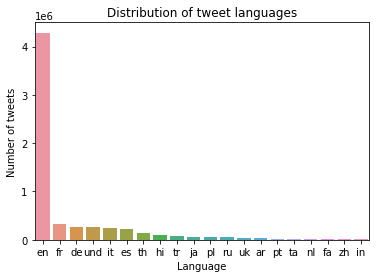

In [2]:
sns.barplot(x=cd.language.value_counts()[:20].index,y=cd.language.value_counts()[:20])
plt.title('Distribution of tweet languages')
plt.ylabel('Number of tweets')
plt.xlabel('Language')
plt.show()

## Hashtags

In [3]:
tags = cd[cd['language'] == 'en']['hashtags'].tolist()
tags = list(set(tags))
TAGS = []

In [4]:
for item in tags:
    TAGS += item[1:-1].split('{')

TAGS2 = []
for item2 in TAGS:
    if item2 != '':
        TAGS2 += [item2.split(': ')[1].split(',')[0][1:-1]]

In [5]:
tagdf = pd.DataFrame(pd.Series(TAGS2).value_counts())
tagdf['tag'] = tagdf.index.tolist()
tagdf.columns = ['counts','tag']
tagdf.index = range(len(tagdf))
tagdf = tagdf[['tag', 'counts']]
tagdf.head(15)

,tag,counts
0,Ukraine,345458
1,Russia,213274
2,Putin,132498
3,UkraineRussiaWar,63811
4,UkraineRussianWar,59810
5,Russian,52421
6,StandWithUkraine,48073
7,NATO,45441
8,UkraineWar,44422
9,RussianUkrainianWar,40781


In [6]:
d = {}
for a, x in tagdf.values:
    d[a] = x

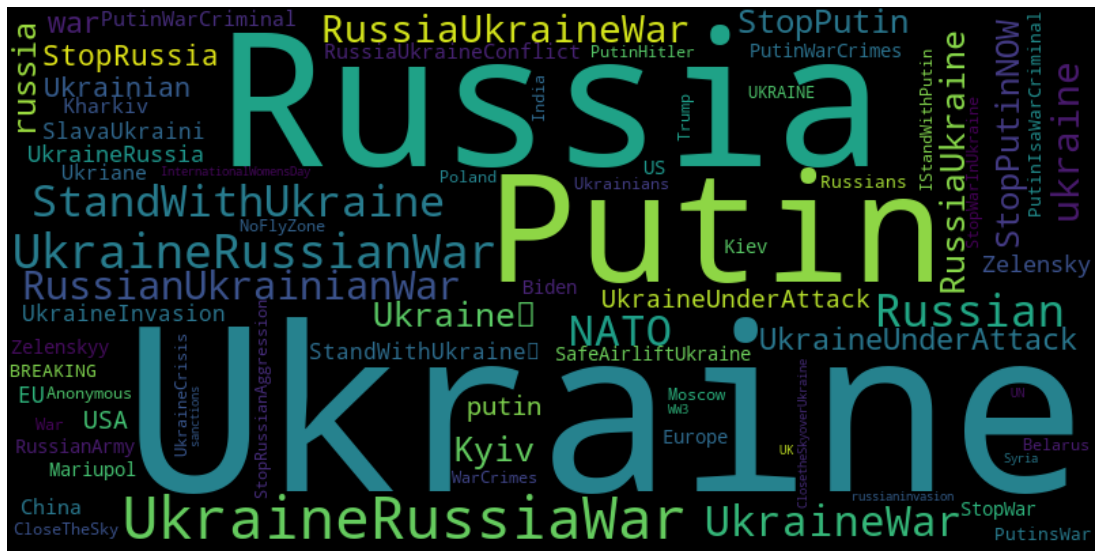

In [7]:
wordcloud = WordCloud(width=800,height=400,max_words=75).generate_from_frequencies(d)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
cd.columns

Index(['userid', 'username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'coordinates',
       'favorite_count', 'extractedts'],
      dtype='object')

## Deduplication 

In [8]:
import re
from tqdm import tqdm

In [9]:
p=re.compile(r'https\:.+', re.DOTALL)
text_clean = [re.sub(p,'',x.strip()) for x in cd.text]
cd['text_clean'] = text_clean

# Sort by timestamp & reset index
cd_sorted_time = cd[['username', 'text_clean', 'retweetcount', 'tweetid', 'tweetcreatedts','language']].sort_values(by='tweetcreatedts')
cd_sorted_time.reset_index(drop=True, inplace=True)

tweets_deduped = dict()

for row in tqdm(range(cd_sorted_time.shape[0])):
    text = cd_sorted_time.text_clean[row]
    tid = cd_sorted_time.tweetid[row]
    if text in tweets_deduped:
        continue
    else:
        tweets_deduped[text] = tid

cd_deduped = cd_sorted_time[cd_sorted_time['tweetid'].isin(tweets_deduped.values())]
cd_deduped.reset_index(drop=True, inplace=True)

100%|██████████████████████████████| 6400515/6400515 [01:16<00:00, 84006.04it/s]


In [12]:
rt = cd_deduped[cd_deduped.language == 'en']
rt = rt.sort_values(by='retweetcount', ascending=False)
rt = rt[['text_clean', 'retweetcount']]

,username,text_clean,retweetcount,tweetid,tweetcreatedts,language
133,andante_pho,.@ZelenskyyUa's tv address to the Russian (!) ...,128664,1497725002908504066,2022-02-27 00:07:21,en
21438,avycdefu,My daughter and I surviving the night in Ukrai...,106502,1497778021608357889,2022-02-27 03:38:02,en
1514187,niyiwealth1,"""It is not the job of black people &amp; ethni...",47720,1501807891203907587,2022-03-10 06:31:18,en
326,cassilclark,I learn to use #Kalashnikov and prepare to bea...,44672,1497725049364619264,2022-02-27 00:07:32,en
161,TrabiMechanic,If you're gonna listen to any speech about #Uk...,43790,1497725005890682880,2022-02-27 00:07:22,en
118,silgote,More than 300 Russian scientists and scientifi...,39222,1497724997883809798,2022-02-27 00:07:20,en
148,blossylou,Geography can be tough. Here’s a guide for Rus...,39075,1497725007971368960,2022-02-27 00:07:22,en
12860,jeantorres31,Six-language coverage from #Kyiv with @AP_GMS....,35747,1497752920762163201,2022-02-27 01:58:17,en
1516168,wcmen007,If you know this face blow the Alarm! ...He mu...,31482,1501815025647902720,2022-03-10 06:59:39,en
1230740,zazizaxxngel,"Quotes of the day\n\n""If my friend dies, I als...",30739,1501070300485922819,2022-03-08 05:40:22,en


In [ ]:
print(rt.to_string())

In [28]:
toprt = rt.head(25)

In [32]:
toprt.to_csv('/Users/danielgrossman/Downloads/toprt.csv')

In [27]:
print(rt.text_clean.head(15).to_string())

133        .@ZelenskyyUa's tv address to the Russian (!) ...
21438      My daughter and I surviving the night in Ukrai...
1514187    "It is not the job of black people &amp; ethni...
326        I learn to use #Kalashnikov and prepare to bea...
161        If you're gonna listen to any speech about #Uk...
118        More than 300 Russian scientists and scientifi...
148        Geography can be tough. Here’s a guide for Rus...
12860      Six-language coverage from #Kyiv with @AP_GMS....
1516168    If you know this face blow the Alarm! ...He mu...
1230740    Quotes of the day\n\n"If my friend dies, I als...
58         JUST IN: #Russian state TV channels have been ...
269894     Name your Top 3 Pussy ass rappers?     Mines? ...
398289     This morning I made a drawing of Trump and Put...
20071      To the free people of the world!\n\nWe feel yo...
62269      We support the weak against the powerful and s...
